----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 7th, 2022)
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


Esta es la parte práctica del examen de Visión artificial, curso 2022-23. 

El examen práctico debería ser resuelto en un máximo de 2,5 horas. Cada ejercicio se encuentra definido con su correspondiendiente puntuación. Priorice adecuadamente. 

Para aprobar la asignatura se han de aprobar ambas partes, teórica y práctica. El examen teórico será el día 16 de Noviembre desde las 15h hasta las 16h en B7. 

Tengase en cuenta que no es tan importante que el resultado final del problema práctico sea exactamente igual a los ejemplos que pueden proporcionarse en los enunciados, sino que se tendrá en cuenta cómo el alumno resuelve el problema y domina los conceptos de la asignatura. Por lo tanto, explicad y documentad bien las soluciones.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

## Ejercicio 1.

### FIFA World Cup

<img src="./images_notebook/world_cup.jpg">

A finales de este mes se celebrará en Qatar la Copa del Mundo de Futbol. A lo largo del globo, personas de todos los países esperan disfrutar de la competición y conocer qué país tiene el equipo más importante. Antes de que comience el torneo, nosotros vamos a realizar nuestra propia predicción.

Nuestra profesora está ilusionada y ha hecho la predición de que la final será disputada por la selección de **Bulgaria** y **Portugal**. Aquí os dejo sus respectivas banderas para que les echeís un ojo.

<img src="./images_notebook/Bulgaria_Portugal.png">

**Nosotros vamos a crear las dos Banderas para realizar nuestra propia predicción.**


**Ex. 1.1) (0.5 pt)**  Comenzaremos creando la Bandera de Bulgaria. Para ello crearemos una imagen RGB con dimensions 200x300. La imagen será de tipo uint8. Los valores para cada franja serán: Blanco, Rojo ([240,0,0]) y Verde ([0, 0, 170]).

**Crear la imagen y visualizarla. Guardar la imagen en formato png.**

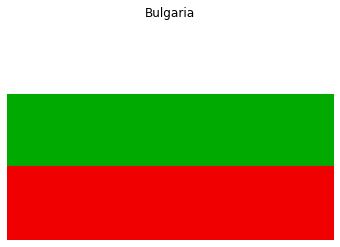

In [12]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Initialize array of the asked shape, with dtype uint8
bulgaria = np.zeros((200, 300, 3), dtype='uint8')

one_third = 200 // 3

# It makes the broadcast automatically
bulgaria[:one_third] = (255, 255, 255)          # White (255 is the max value)
bulgaria[one_third:2*one_third] = (0, 170, 0)   # Green (was wrong in the statement?)
bulgaria[2*one_third:] = (240, 0, 0)            # Red

# Save the image. I save it in the direct directory to be able to tell apart from the rest
io.imsave('bulgaria.png', bulgaria) # in the folder images_notebook

plt.imshow(bulgaria)
plt.title('Bulgaria')
plt.axis('off')
plt.show()

**Ex. 1.2) (1.5 pt)**  La bandera de Portugal es un poco más complicada. Comenzaremos creando  una imagen RGB con dimensions 200x300. Los valores para cada franja serán: Rojo [206,0,0] y Verde [0, 142, 0]. La franja verde tendrá 120 pixels de ancho.

Después deberemos insertar el escudo. Para ello hemos de leer la imagen `images_notebook/escudo_Portugal.jpg`. Dentro de la bandera, el escudo tendra un tamaño de 100x100 pixels. 

Al final, la bandera debería ser **similar** a la propuesta anteriormente.

**Crear la imagen y visualizarla. Guardar la imagen en formato png.**

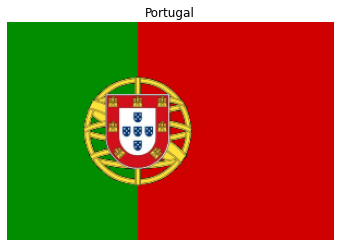

In [52]:
from skimage.transform import resize
from skimage import img_as_ubyte

# We create the portugal image
portugal = np.zeros((200, 300, 3), dtype='uint8')
portugal[:, :120] = (0, 142, 0)
portugal[:, 120:] = (206, 0, 0)


# Load the shield
escudo_original = io.imread('images_notebook/escudo_Portugal.jpg')

# Resize to 100x100(x3) pixels
escudo_float = resize(escudo_original, (100, 100))

# We will work with uint8 as the last exercise
escudo = img_as_ubyte(escudo_float)


# Create a mask where the shield is not almost black
mask = np.apply_along_axis(lambda x: not np.all(x < 30), 2, escudo)

# We add the shield at the pixels where mask = True
portugal[50: 50+escudo.shape[0], 70:70+escudo.shape[1]][mask] = escudo[mask]

# Save the image
io.imsave('portugal.png', portugal)

plt.imshow(portugal)
plt.title('Portugal')
plt.axis('off')
plt.show()

**Ex. 1.3) (0.5 pt)**  Para hacer nuestra predicción final, convertiremos ambas imágenes a escala de grises  y restaremos las dos imágenes (haciendo `Bulgaria_gray` **-** `Portugal_gray`). Visualizaremos las tres imágenes en una sola figura, con sus respectivos nombres.

Calcularemos la media de la imagen de diferencias. Si la media sale positiva, el **Bulgaria** se llevará la copa del mundo. En caso de que sea negativa, será **Portugal** el campeón.

En este caso, **quién ganará el mundial?**

Bulgaria será el campeón


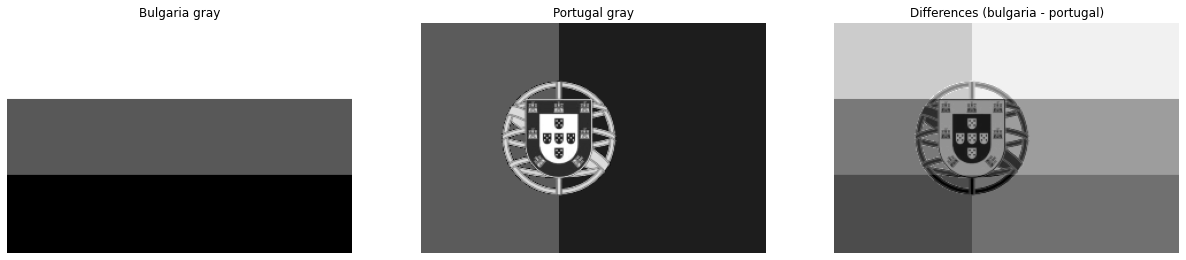

In [55]:
from skimage.color import rgb2gray

# Now they are floats
bulgaria_gray = rgb2gray(bulgaria)
portugal_gray = rgb2gray(portugal)
differences = bulgaria_gray - portugal_gray

fig, axs = plt.subplots(ncols=3, figsize=(21, 7))

axs[0].imshow(bulgaria_gray, cmap='gray')
axs[0].set_title('Bulgaria gray')
axs[0].axis('off')

axs[1].imshow(portugal_gray, cmap='gray')
axs[1].set_title('Portugal gray')
axs[1].axis('off')

axs[2].imshow(differences, cmap='gray')
axs[2].set_title('Differences (bulgaria - portugal)')
axs[2].axis('off')

media = np.mean(differences)
print('Portugal' if media < 0 else 'Bulgaria', 'será el campeón')

plt.show()

## Ejercicio 2

### Pay per View

Por desgracia, uno de los grandes problemas que tenemos los aficionados a la hora de ver el futbol es que la mayoría de los partidos se emiten por pay per view. Como buenos informáticos, hemos realizado una búsqueda por internet para encontrar alguna página que nos permita ver los partidos que nos interesen. Sin embargo, la calidad no es óptima. Os dejo una muestra:

<img src='images_notebook/big_frame.jpg'>

**Vamos a probar algunos filtros a ver si podemos mejorar la calidad**

**Ex 2.1) (1 pt.)** Leed la imagen `images_notebook/big_frame.jpg` y aplicad los filtros conocidos por la prácticas: **filtro de media**, **filtro de mediana** y **filtro gausiano**. 

En el filtro de media, utilizaremos un máscara 2D para realizar la convolución. En el filtro de mediana, utilizaremos el kernel disk (`from skimage.morphology import disk`) tal y como se realizó en la practicas.

Teneís que buscar un tamaño de las máscaras, así como el valor sigma del filtro gausiano, adecuado para reducir el ruido pero que, a su vez, se puedan diferenciar las formas de la imagen. 

**Visualizar la imagen original y las resultantes en una sola figura, con sus respectivos títulos. Comentad brevemente qué hace cada filtro así como cual puede ser más adecuado para este problema.**

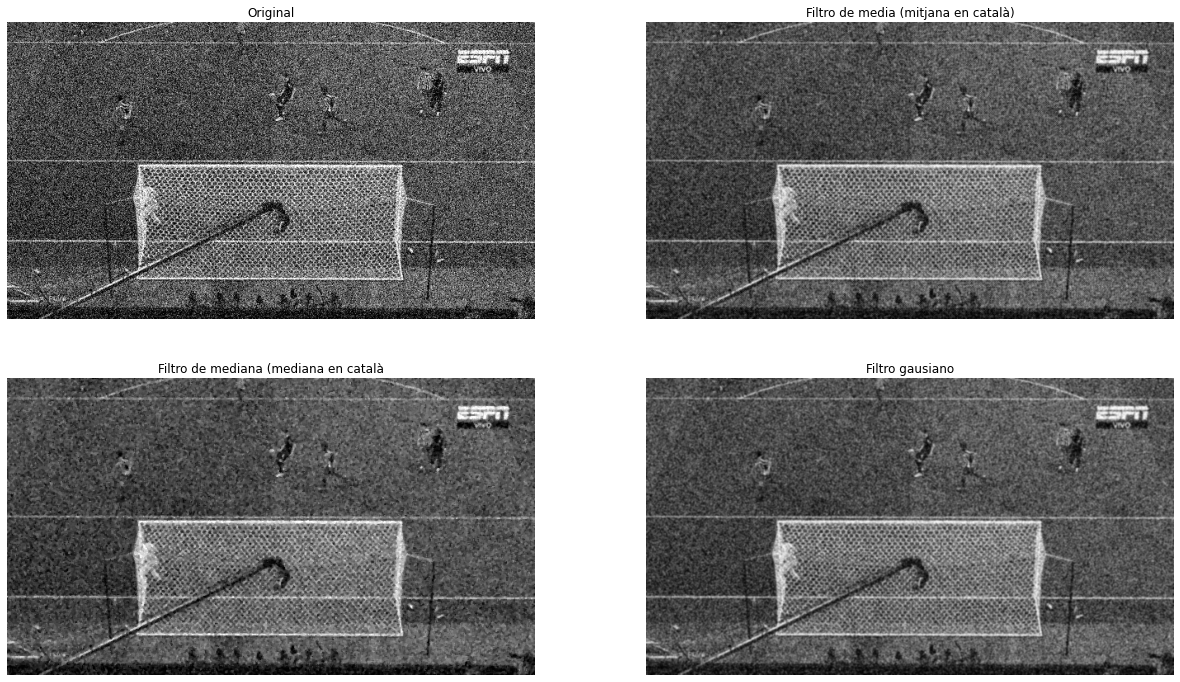

In [78]:
from skimage.filters import median, gaussian
from skimage.morphology import disk
from scipy.ndimage import convolve

# Imagen original
big_frame = io.imread('images_notebook/big_frame.jpg')

# Filtro de media
mask = disk(1)
normalized_mask = mask / mask.sum()
filter_media = convolve(big_frame, normalized_mask)

# Filtro de mediana
filter_mediana = median(big_frame)

# Filtro de Gauss
gilter_gauss = gaussian(big_frame, sigma=0.8)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21, 12))

axs[0, 0].imshow(big_frame, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(filter_media, cmap='gray')
axs[0, 1].set_title('Filtro de media (mitjana en català)')
axs[0, 1].axis('off')

axs[1, 0].imshow(filter_mediana, cmap='gray')
axs[1, 0].set_title('Filtro de mediana (mediana en català')
axs[1, 0].axis('off')

axs[1, 1].imshow(gilter_gauss, cmap='gray')
axs[1, 1].set_title('Filtro gausiano')
axs[1, 1].axis('off')

plt.show()

**Ex 2.2) (1 pt.)** Utilizando sólamente el filtro que os parezca más adecuado, vamos a aplicarlo a todo un video. Para ello, carga y visualiza las imágenes que se encuentra en el carpeta `images_notebook/video_random`. Una vez comprobado que todo funciona correctamente (las imágenes han de verse con ruido), aplica el filtro que mejor resultado te haya dado en el apartado anterior para visualizar las imágenes tan limpias como sea posible.

In [5]:
#your solution

## Ejercicio 3.

En los años 90, dos grandes estrellas del balón nos hicieron vibrar, enseñándonos a jugar al futbol como nunca antes se había hecho. Corriendo por kilométricos campos de futbol, que hacían temblar a los terraplanistas, nos enseñaban semana a semana lo que era el fair play. ¿Tal vez fue Figo? ¿Ronaldo el gordo? ¿Roberto Carlos y sus disparos con efecto?... **NO!** Los grandes ídolos de la época fueron Oliver y Benji, conocidos por la serie Campeones. 

<img src='images_notebook/campeones_1.jpg' width= 600>


In [15]:
%matplotlib inline

**Ex 3.1) (0.5 pt.)** Lee la imagen `images_notebook/campeones_frame.png`. Visualiza la imagen e imprime el tipo de datos así como el tamaño de la misma (número de filas, número de columnas y canales)

Tipo de datos: uint8
Tamaño imagen (nº filas, nº columnas, nº canales): (426, 689, 4)


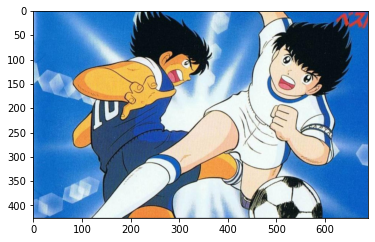

In [81]:
campeones_frame = io.imread('images_notebook/campeones_frame.png')

print('Tipo de datos:', campeones_frame.dtype)
print('Tamaño imagen (nº filas, nº columnas, nº canales):', campeones_frame.shape)

plt.imshow(campeones_frame)
plt.show()

**Ex 3.2) (2 pt.)** Vamos a segmentar la imagen utilizando los algoritmos de Fenzenszwalb, SLIC y Quickshift. Para cada uno de ellos, busca unos parámetros que parezcan adecuados. Por ejemplo, para el Fenzenszwald, modifica `scale`, `sigma` y `min_size`. En caso de SLIC, teenmos `n_segments`, `compactness`y `sigma`.

**Explica brevemente en qué consiste cada uno de los algoritmos y visualiza la segmentación resultante.**

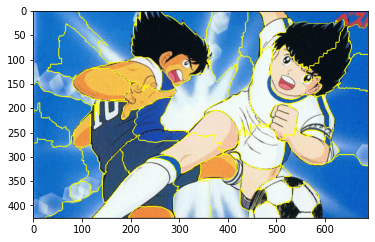

In [105]:
from skimage.segmentation import mark_boundaries, felzenszwalb, slic, quickshift
from skimage.color import rgba2rgb

# We transfrom it to RGB to avoid problems
campeones = rgba2rgb(campeones_frame)


filtro_fel = felzenszwalb(campeones, scale=500, sigma=1.5, min_size=100)
imagen_fel = mark_boundaries(campeones, filtro_fel)

filtro_slic = slic(campeones, n_segments=30, compactness=10, sigma=1.5)
imagen_slic = mark_boundaries(campeones, filtro_slic)

filtro_quick = quickshift(campeones, kernel_size=8, ratio=1, sigma=2, max_dist=100)
imagen_quick = mark_boundaries(campeones, filtro_quick)

plt.imshow(imagen_quick)
plt.show()

**Ex 3.3) (0.5 pt.)** Visualiza las tres segmentaciones, con sus respectivos títulos en una sola imagen y comparalas. **¿Cuál te parece la más adecuada?**

<img src='images_notebook/campeones_segmentation.png'>

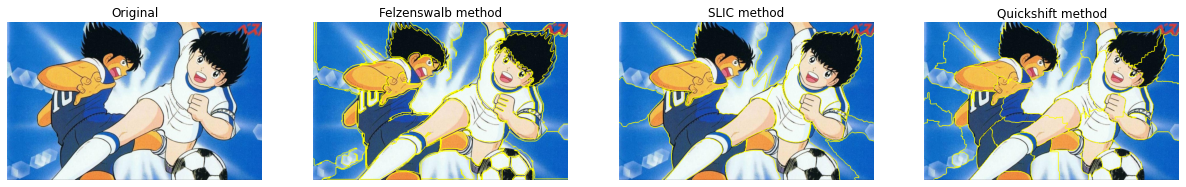

In [106]:
def plot_row(images, titles):
    fig, axs = plt.subplots(ncols=len(images), figsize=(21, 7))
    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.show()

plot_row([campeones, imagen_fel, imagen_slic, imagen_quick], ['Original', 'Felzenswalb method', 'SLIC method', 'Quickshift method'])